## **Введение**

### Цель работы:
- изучить метод разностных аппроксимаций для уравнения теплопроводности;
- составить алгоритмы решения уравнения теплопроводности методом сеток, применимыми для организации вычислений на ПЭВМ;
- составить программы решения уравнения теплопроводности по разработанным алгоритмам;
- выполнить тестовые примеры и проверить правильность работы программ;
- получить численное решение заданного уравнения теплопроводности.


### Условия задания

Условия задания были выбраны исходя из варианта

In [ ]:
VARIANT_NUMBER = 8

## **Программная реализация**

В качестве языка программирования использован Python 3.8.5  и среда программирования Jupyter Lab 2.2.7. Использовались библиотеки numpy - для работы с матрицами, векторизации функций, matplolib - для визуализации, а также встроенная библиотека с простейшими математическими функциями math.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import axes3d, Axes3D

from math import *


Для решения первого и второго задания был переиспользован алгоритм решения тридиагональной системы линейных уравнений.

In [ ]:
def solve_tridigional_matrix(
    upper_diagonal, middle_diagonal, lower_diagonal, result_vector
):
    c_prime = np.zeros(middle_diagonal.size - 1)
    d_prime = np.zeros(middle_diagonal.size)

    c_prime[0] = upper_diagonal[0] / middle_diagonal[0]
    for i in range(1, middle_diagonal.size - 1):
        c_prime[i] = upper_diagonal[i] / (
            middle_diagonal[i] - lower_diagonal[i - 1] * c_prime[i - 1]
        )

    d_prime[0] = result_vector[0] / middle_diagonal[0]
    for i in range(1, middle_diagonal.size):
        d_prime[i] = (result_vector[i] - lower_diagonal[i - 1] * d_prime[i - 1]) / (
            middle_diagonal[i] - lower_diagonal[i - 1] * c_prime[i - 1]
        )

    solution = np.zeros(middle_diagonal.size)
    solution[-1] = d_prime[-1]

    for i in reversed(range(middle_diagonal.size - 1)):
        solution[i] = d_prime[i] - c_prime[i] * solution[i + 1]
    return solution

## Задание №1

In [ ]:
def get_differential_schema(h: float, left_bound: float, right_bound: float, 
                            left_condition: float, right_condition: float,
                            k_function, f_function):
    x_points = np.arange(left_bound, right_bound, h)
    
    upper_diagonal = np.zeros(x_points.size - 1)
    upper_diagonal[1:] = np.vectorize(lambda x: k_function(x) / (2 * h ** 2))(x_points[2:])
    
    middle_diagonal = np.ones(x_points.size)
    middle_diagonal[1:-1] = -(np.vectorize(lambda x: k_function(x) / (2 * h ** 2))(x_points[2:]) + \
        np.vectorize(lambda x: k_function(x) / (2 * h ** 2))(x_points[:-2]))
    
    lower_diagonal = np.zeros(x_points.size - 1)
    lower_diagonal[:-1] = np.vectorize(lambda  x: k_function(x) / (2 * h ** 2))(x_points[:-2])
    
    result = np.vectorize(f_function)(x_points)
    result[0] = left_condition
    result[-1] = right_condition
    
    return upper_diagonal, middle_diagonal, lower_diagonal, result

In [ ]:
def solve_differential_equation(h: float, left_bound: float, right_bound: float, 
                            left_condition: float, right_condition: float,
                            k_function, f_function):
    return solve_tridigional_matrix(*get_differential_schema(h, left_bound, right_bound, 
                                                             left_condition, right_condition, 
                                                             k_function, f_function))

In [ ]:
f_function = lambda x: (3 * x ** 2 + 4) 
k_function = lambda x: (1 / x**2)

left_bound = 1.2
right_bound = 2.4

h = (right_bound - left_bound) / 150

left_condition = -4
right_condition = 1

1. При заданных в индивидуальном варианте функциях $K(x)$ (что соответствует $K(x,1)$), $f(x)$ и значениях $U_A$ , $U_B$ найти аналитическое решение.


Рассмотрим (исходя из варианта условия) дифференциальное уравнение вида $$
-\frac{d(x^{-2}\frac{d u}{d x})}{d x} = 3x^2 + 4  
$$ Проинтегрируем две части уравнения:
$$ \int -\frac{d(x^{-2}\frac{d u}{d x})}{d x} dx = \int 3x^2 + 4 dx $$
Получим:
$$ -x^{-2} \frac{du}{dx} = x^3 + 4x + C_1$$ Приведем полученное выражение к удобному виду:
$$\frac{du}{dx} = -x^{5} - 4x^{3} + C_1x^{2}$$ Еще раз проинтегрируем выражение:
$$u(x) = -\frac{x^6}{6} - x^4 + C_1x^3 + C_2$$
Найдем коэффициенты $C_1$ и $C_2$ из системы (использовав начальные условия):
$$\begin{cases} 1.2 &= \frac{-(-4)^6}{6} - (-4)^4 + (-4)^3C_1 + C_2 \\
2.4 &= \frac{-(1)^6}{6} - (1)^4 + (1)^3C_1 + C_2 
\end{cases}$$
Решив получим $C_1 = -3.828$ и $C_2 = 8.228$
Таким образом, решение уравнения имеет вид:
$u(x) = -\frac{x^6}{6} - x^4 + -3.828x^3 + 8.228$

2. Изменяя значения параметра с в коэффициенте теплопроводности, найти решения задачи для наборов параметров 1−3. На одном чертеже построить графики найденных решений. Сравнить полученные результаты.


In [ ]:
def plot_solutions(x_points: np.array, solutions: list, labels: list):
    figure = plt.figure()
    figure.set_size_inches(12, 9)
    plt.title('Результаты решение дифференциального уравнения для \n различных функций из семейства $K(x, c)$')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    for solution, label in zip(solutions, labels):
        plt.plot(x_points, solution, label=label)
    plt.legend()

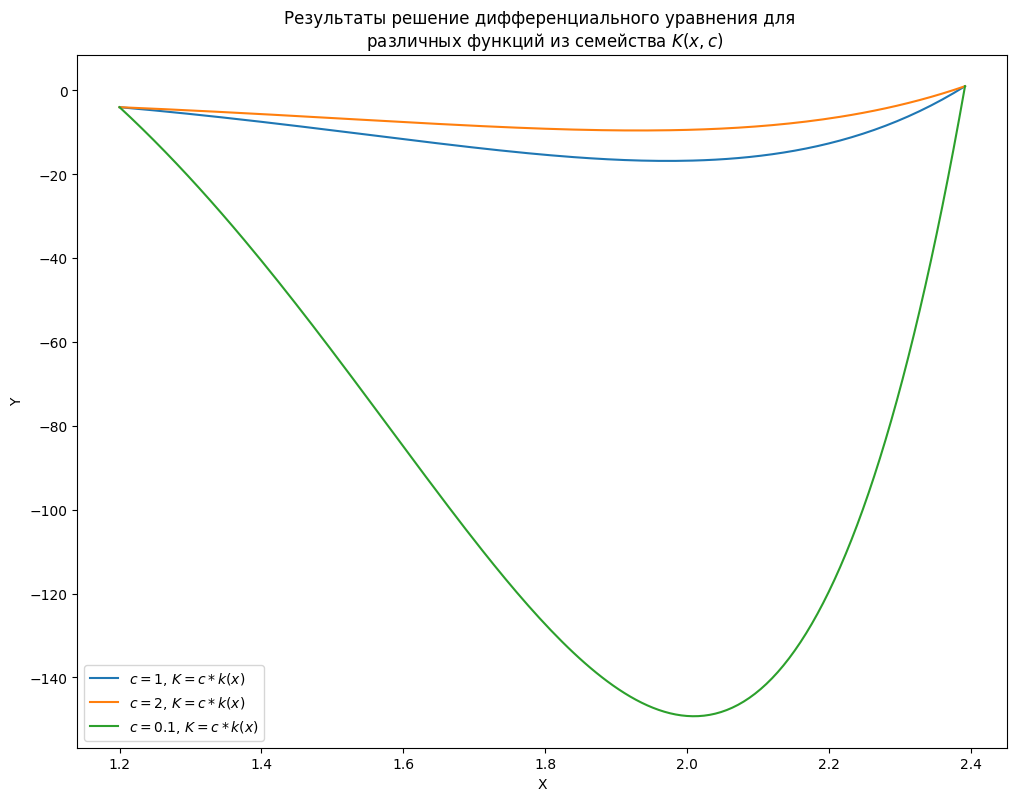

In [ ]:
first_set_k_function = lambda x: k_function(x)
second_set_k_function = lambda x: 2 * k_function(x)
third_set_k_function = lambda x: 0.1 * k_function(x)

first_solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, first_set_k_function, f_function)

second_solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, second_set_k_function, f_function)

third_solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, third_set_k_function, f_function)

plot_solutions(np.arange(left_bound, right_bound, h), [first_solution, second_solution, third_solution], 
               ['$c = 1$, $K=c*k(x)$', '$c = 2$, $K=c*k(x)$', '$c = 0.1$, $K=c*k(x)$'])

3. Аналогично п. 2, найти аналитическое решение для четвертого набора параметров. На одном чертеже построить графики решений для наборов один и четыре. Сравнить полученные результаты.


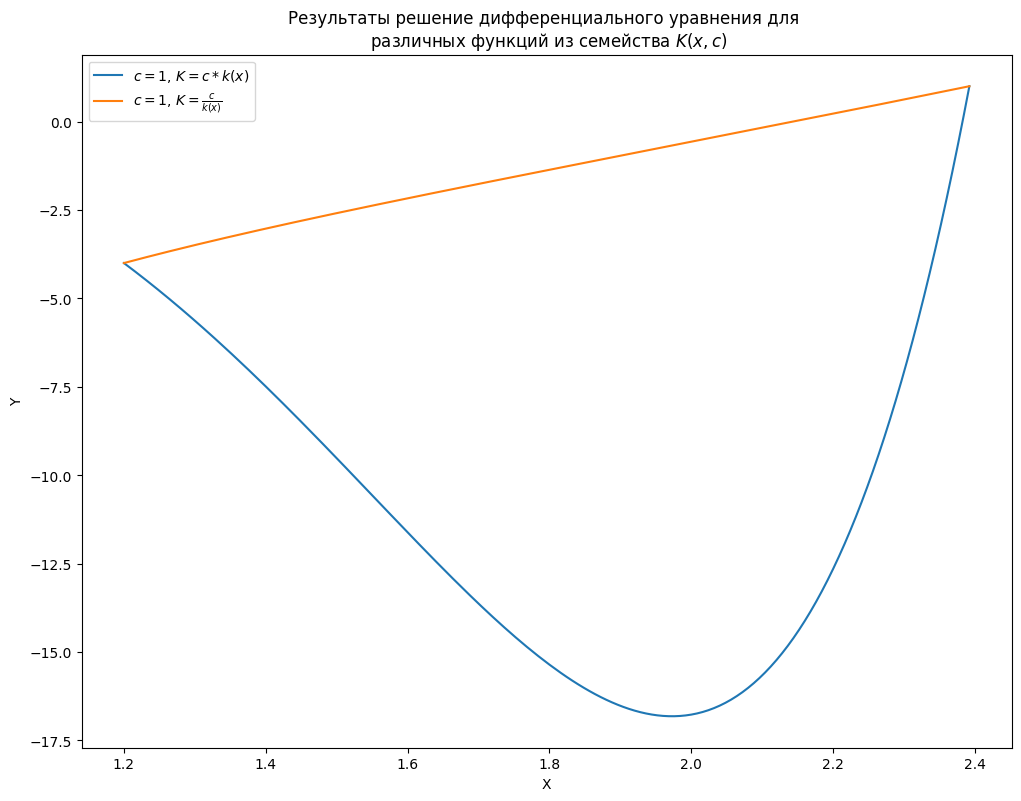

In [ ]:
fourth_set_k_function = lambda x: 1 / k_function(x)

fourth_solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, fourth_set_k_function, f_function)

plot_solutions(np.arange(left_bound, right_bound, h), [first_solution, fourth_solution], 
               ['$c = 1$, $K=c*k(x)$', '$c = 1$, $K=\\frac{c}{k(x)}$'])

4. Изменяя граничные условия $U_A$ , $U_B$ , построить решения для наборов параметров 5−7.


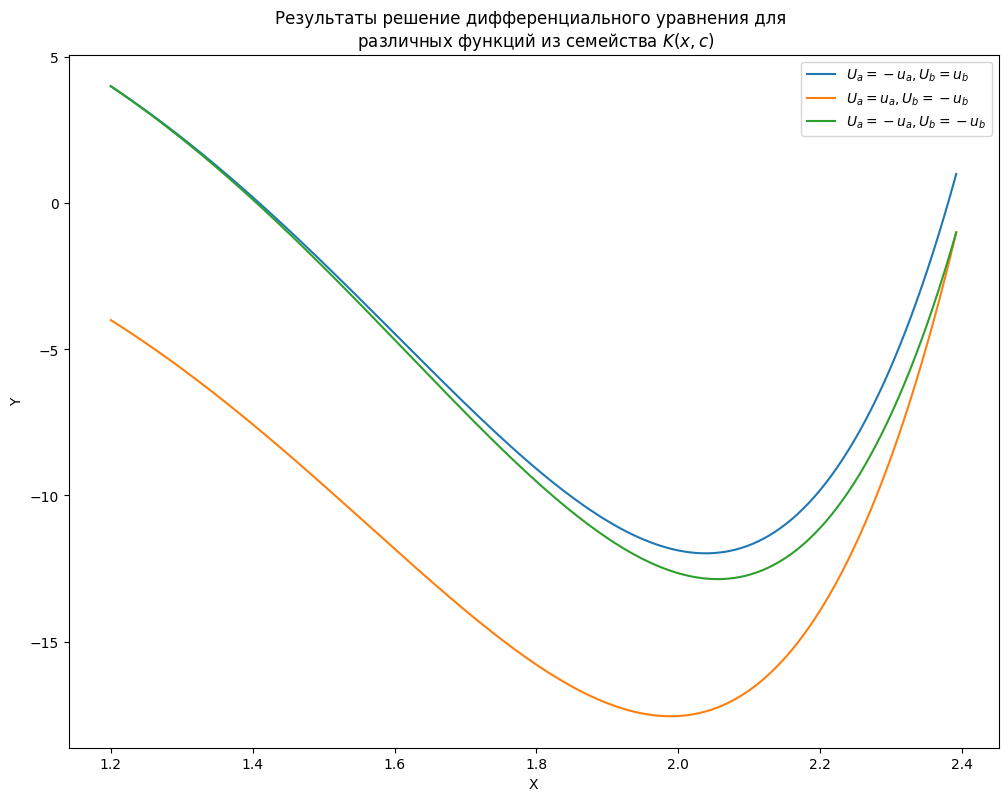

In [ ]:
fifth_set_left_condition = -left_condition
fifth_set_right_condition = right_condition

sixth_set_left_condition = left_condition
sixth_set_right_condition = -right_condition

seventh_set_left_condition = -left_condition
seventh_set_right_condition = -right_condition

fifth_set_solution = solve_differential_equation(h, left_bound, right_bound, 
                                                 fifth_set_left_condition, fifth_set_right_condition, 
                                                 k_function, f_function)

sixth_set_solution = solve_differential_equation(h, left_bound, right_bound, 
                                                 sixth_set_left_condition, sixth_set_right_condition, 
                                                 k_function, f_function)

seventh_set_solution = solve_differential_equation(h, left_bound, right_bound, 
                                                 seventh_set_left_condition, seventh_set_right_condition,
                                                   k_function, f_function)

plot_solutions(np.arange(left_bound, right_bound, h), [fifth_set_solution, sixth_set_solution, 
                                                       seventh_set_solution],
               ['$U_a = -u_a, U_b = u_b$', '$U_a = u_a, U_b = -u_b$', '$U_a = -u_a, U_b = -u_b$'])


## Задание №2

In [ ]:
def plot_solution(h: float, left_bound: float, right_bound: float, solution: np.array) -> None:
    x_points = np.arange(left_bound, right_bound, h)
    plt.plot(x_points, solution)

In [ ]:
f_function = lambda x: (3 * x ** 2 + 4) 

left_bound = 1.2
right_bound = 2.4

left_condition = -4
right_condition = 1

h = (right_bound - left_bound) / 150

1. Положим, что стержень состоит из двуx материалов с различными, коэффициентами теплопроводности $k(x)$:
$$ k(x) = \begin{cases}k_1, a \le x \le 0.5 (b + a) \\ 
k_2, 0.5(b + a) < x \le b
\end{cases}$$


In [ ]:
def k_function_two_materials(x):
    if left_bound <= x <= 0.5 * (left_bound + right_bound):
        return k_1
    else:
        return k_2

a) $k_1 << k_2$

In [ ]:
k_1 = 0.5
k_2 = 20

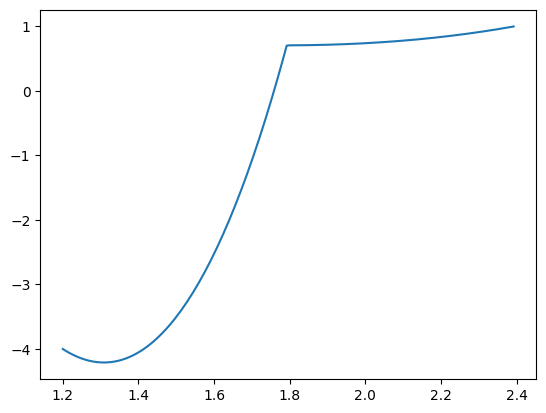

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function_two_materials, f_function)
plot_solution(h, left_bound, right_bound, solution)

б) $k_1 >> k_2$

In [ ]:
k_1 = 10
k_2 = 0.5

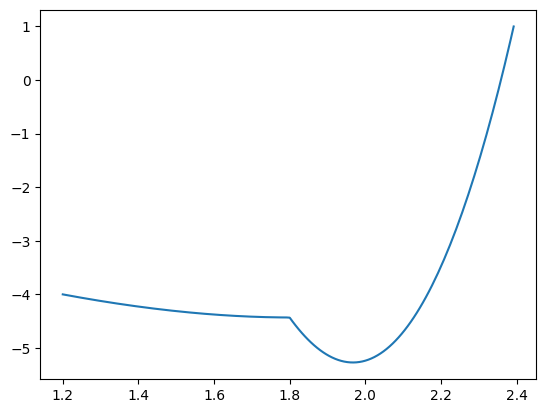

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function_two_materials, f_function)
plot_solution(h, left_bound, right_bound, solution)

2. Пусть стержень состоит из треx материалов с различными свойствами:
$$k(x) = \begin{cases} k_1 \ a \le x \le a + \frac{b - a}{3} \\
k_2 \ a + \frac{b - a}{3}  \le x \le a + 2\frac{b - a}{3} \\
k_3 \ a + 2\frac{b - a}{3}  \le x \le b
\end{cases}$$

In [ ]:
def k_function_three_materials(x):
    if left_bound <= x < left_bound + (right_bound - left_bound) / 3:
        return k_1
    elif left_bound + (right_bound - left_bound) / 3 <= x < left_bound + 2 * (right_bound - left_bound) / 3:
        return k_2
    elif left_bound + 2 * (right_bound - left_bound) / 3 <= x < right_bound:
        return k_3

- a) $k_1 < k_2 < k_3$

In [ ]:
k_1 = 3
k_2 = 10
k_3 = 15

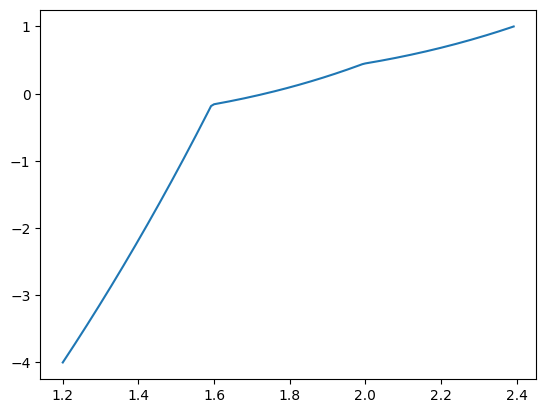

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function_three_materials, f_function)
plot_solution(h, left_bound, right_bound, solution)

- б) $k_1 > k_2 > k_3$

In [ ]:
k_1 = 15
k_2 = 10
k_3 = 5

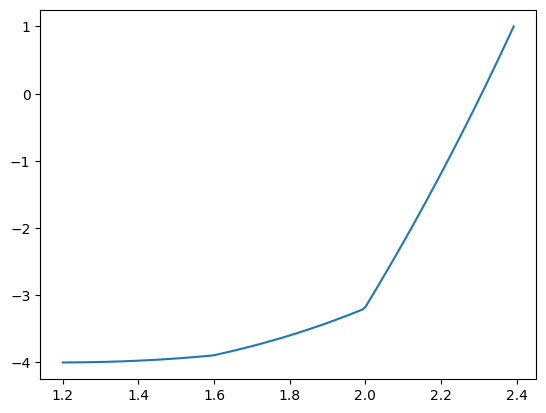

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function_three_materials, f_function)
plot_solution(h, left_bound, right_bound, solution)

- в) $k_1 = k, k_2 = 2k, k_3 = k$


In [ ]:
k = 4
k_1 = k
k_2 = 2 * k
k_3 = k

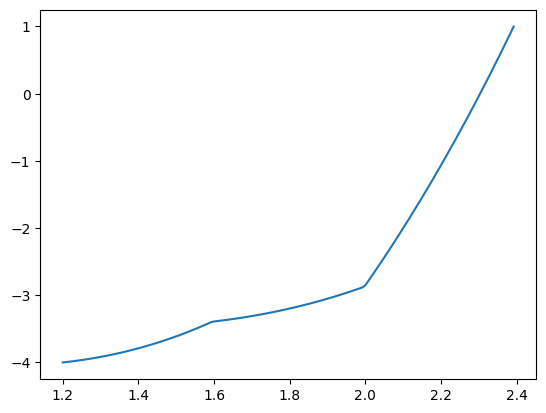

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function_three_materials, f_function)
plot_solution(h, left_bound, right_bound, solution)

- г) $k_1 = 20k, k_2 = 2k, k_3 = 20k$

In [ ]:
k = 0.1
k_1 = 20 * k
k_2 = 2 * k
k_3 = 20 * k

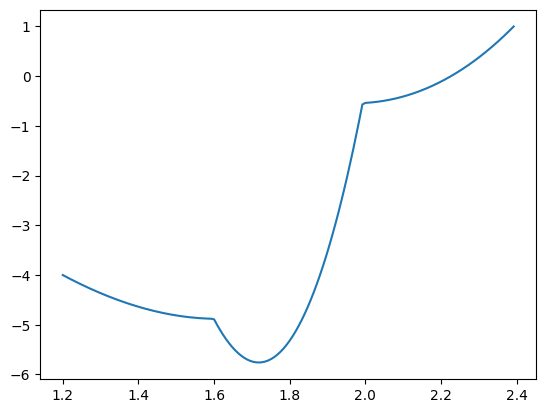

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function_three_materials, f_function)
plot_solution(h, left_bound, right_bound, solution)

5. Промоделировать процесс теплопроводности в зависимости от правой части – функции f(x), предполагая, что f(x) − точечный источник тепла. Задать точечный источник тепла можно следующим образом: $f(x) = c\delta(x − x_0)$ , где c − некоторая константа (мощность источника); $\delta(x)$ − дельта-функция; $x_0$ − точка из отрезка $[a,b]$, в которой располагается источник. Рассмотреть следующие варианты расположения источника:

В данном случае, требуется применить метод баланса
    
Для данного уравнения получим консервативную разностную схему:

$$\begin{equation}
  \begin{cases}
    \frac{1}{h}(b_n\frac{y_{n+1}-y_n}{h}-a_n\frac{y_n-y_{n-1}}{h})=-\phi_n, n = 1,2,...N-1 \\
    y_0=g_1, y_n=g_2. \end{cases}
\end{equation}$$, где:
$a_n = (\frac{1}{h} \int_{x_{n-1}}^{x_n} \frac{dx}{k(x)})^{-1}$,

$b_n = (\frac{1}{h} \int_{x_{n}}^{x_{n+1}} \frac{dx}{k(x)})^{-1}$,

$\phi_n = \frac{1}{h} \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx$,

$g_1=u(a), g_2=u(b)$
    
Раскроем скобки:
    
$ \frac{a_n}{h^2} y_{n-1} - \frac{a_n + b_n}{h^2}y_n + \frac{b_n}{h^2}y_{n+1} = -\varphi_n$

In [ ]:
def get_differential_schema(h: float, left_bound: float, right_bound: float, 
                            left_condition: float, right_condition: float,
                            k_function, f_function):
    x_points = np.arange(left_bound, right_bound, h)
    
    upper_diagonal = np.zeros(x_points.size - 1)
    upper_diagonal[1:] = np.vectorize(lambda x: 2 / (h * (k_function(x) + k_function(x - h))))(x_points[2:])
    
    middle_diagonal = np.ones(x_points.size)
    middle_diagonal[1:-1] = -(np.vectorize(lambda x: 2 / (h * (k_function(x) + k_function(x - h))))(x_points[2:])
                             + np.vectorize(lambda x: 2 / (h * (k_function(x + h) + k_function(x))))(x_points[:-2]))
    
    lower_diagonal = np.zeros(x_points.size - 1)
    lower_diagonal[:-1] = np.vectorize(lambda x: 2 / (h * (k_function(x) + k_function(x + h))))(x_points[:-2])
    
    result = -np.vectorize(f_function)(x_points)
    result[0] = left_condition
    result[-1] = right_condition
    
    return upper_diagonal, middle_diagonal, lower_diagonal, result

In [ ]:
def f_function_integrated(x, x_0, c):
    if abs(x - x_0) - h/2 < 1e-5:
        return c / 2
    elif x - h/2 < x_0 < x + h/2:
        return c
    else:
        return 0

а) точечный источник поставлен в середину отрезка $[a,b]$;

In [ ]:
left_condition = 0
right_condition = 0

x_0 = (left_bound + right_bound) / 2
c = 11
f_function = lambda x: f_function_integrated(x, x_0, c)

k_1 = 2
k_2 = 5
k_function = lambda x: k_function_two_materials(x)

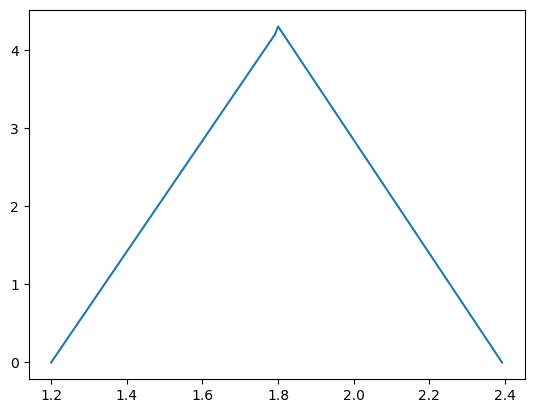

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function, f_function)
plot_solution(h, left_bound, right_bound, solution)

б) два одинаковых по мощности источника поставлены в разные точки отрезка, симметричные относительно середины отрезка;


In [ ]:
left_condition = 0
right_condition = 0

x_0_1 = (left_bound + right_bound) * (0.5 - 0.1)
c_1 = 20
x_0_2 = (left_bound + right_bound) * (0.5 + 0.1)
c_2 = 20

f_function = lambda x: f_function_integrated(x, x_0_1, c_1) + f_function_integrated(x, x_0_2, c_2) 

k_1 = 2
k_2 = 2
k_function = lambda x: k_function_two_materials(x)

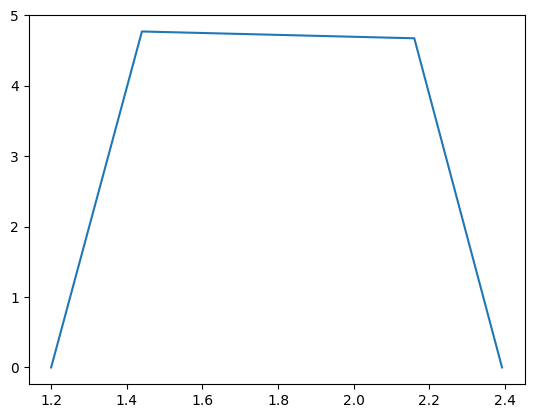

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function, f_function)
plot_solution(h, left_bound, right_bound, solution)

в) два различных по мощности источника поставлены симметрично;

In [ ]:
left_condition = 0
right_condition = 0

x_0_1 = (left_bound + right_bound) * (0.5 - 0.1)
c_1 = 15
x_0_2 = (left_bound + right_bound) * (0.5 + 0.1)
c_2 = 20

f_function = lambda x: f_function_integrated(x, x_0_1, c_1) + f_function_integrated(x, x_0_2, c_2) 

k_1 = 1
k_2 = 2
k_function = lambda x: k_function_two_materials(x)

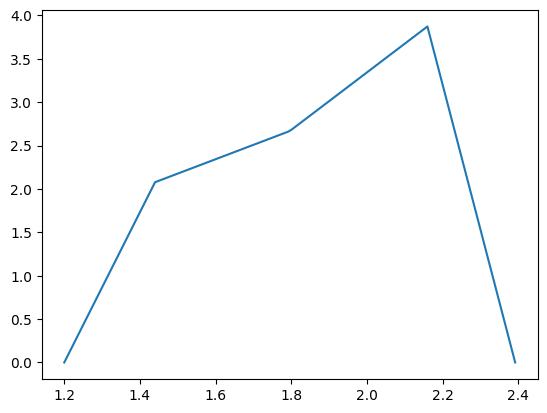

In [ ]:
solution = solve_differential_equation(h, left_bound, right_bound, 
                                       left_condition, right_condition, k_function, f_function)
plot_solution(h, left_bound, right_bound, solution)

## Задание №3

Построим общие для разных условий постановки задачи инструменты решения. Рассмотрим в общем виде явную разностную схему вида:
$$ \begin{cases} L_1^hy_k^v := g_{1_k}\frac{y_k^v - y_k^{v - 1}}{\tau} + g_{2_k}\frac{y_{k + 1}^{v - 1}
-2y_k^{v - 1} + y_{k - 1}^{v - 1}}{h^2} = f_k^{v - 1}  \\
y_0^{v} = t_1^{v} \ \forall v \in [0, T] \\
y_n^{v} = t_2^{v} \ \forall v \in [0, T] \\
y_k^{0} = t_{3_k} \ \forall k \in [0, n] \\
\end{cases}$$
Решим первое уравнение относительно $y_{k}^v$, получим схему решения вида:
$$ y_k^v = -y_{k + 1}^{v - 1} \frac{\tau g_{2_k}}{g_{1_k}} + y_{k}^{v - 1}(1 - \frac{2 \tau g_{2_k}}{g_{1_k}}) 
- y_{k - 1}^{v - 1}\frac{\tau g_{2_k}}{g_{1_k}} + f_k^v$$ При этом: 
$$\begin{cases} 
y_0^{v} = t_1^{v} \ \forall v \in [0, T] \\
y_n^{v} = t_2^{v} \ \forall v \in [0, T] \\
y_k^{0} = t_{3_k} \ \forall k \in [0, n] \\
\end{cases}$$
Переобозначим первое уравнение как:
$$ y_k^v = y_{k + 1}^{v - 1} g'_{1_k} + y_{k}^{v - 1}g'_{2_k} + y_{k - 1}^{v - 1}g'_{3_k} + f_k^v$$


Решение будет получено вычислением последовательно, слой за слоем значений $y_k^v$ для слоя $v$. При этом, начальные условия позволяют получить необходимые значения для нулевого слоя $v = 0$, а также для левых и правых границ слоя $k = 0$ и $k = n$.
Для оптимизации решения, был выбран следующий подход:
- Для каждой задачи (независимо от условий) определены две функции: `compute_layer` и `compute_explicit_scheme`. Функция `compute_layer` принимает предыдущий вычесленнный слой, матрицу коэффициентов (которая будет описана в следующем пункте), а также значения для граничных элементов на данном слое. Функция `compute_explicit_scheme` вычисляет решение данной задачи и параметризуется cледующими параметрами `h` - шаг сетки по Ox, `theta` - шаг сетки по $Ot$, `left_bound` - левая граница каждого слоя, `right_bound` - правая граница каждого слоя ($left\_bound <= x <= right\_bound$), аналогично для  $t$ параметры `lower_bound` и `upper_bound`, `left_condition_function` и `right_condition_function` - функции для вычисления граничных значений на каждом слое, функция `f_function` - функция $f$ в решаемой задаче, `initial_layer_function` - функция для вычисления нулевого слоя и `scheme_coefficients_function` - функция вычисления матрицы коэффициентов для конкретной задачи.
- Специфической для каждой задачи является функции вычисления матрицы коэффициентов, использующейся на каждом этапе вычесления слоя. Для решения явной схемы вида $$y_k^v = y_{k + 1}^{v - 1} g'_{1_k} + y_{k}^{v - 1}g'_{2_k} + y_{k - 1}^{v - 1}g'_{3_k}$$ составим матрицу $$\begin{pmatrix} g'_{2} & g'_{1} & g'_{0} \\ g'_{3} & g'_{2} & g'_{1} \\  \vdots & \vdots & \vdots \\g'_{n} & g'_{n - 1} & g'_{n - 2} \end{pmatrix}$$ Чтобы получить очередной слой $v$, требуется на каждем шаге составить (на основании предыдущего шага $v - 1$) еще одну матрицу вида $$\begin{pmatrix} y_{2}^{v - 1} & \dots & y_{n}^{v - 1} \\ y_{1}^{v - 1} & \dots & y_{n - 1}^{v - 1} \\ y_{0}^{v - 1} & \dots & y_{n - 2}^{v - 1} \end{pmatrix}$$ Перемножив матрицу коэффициентов и данную, выбрав из результата диагональные элементы, мы получим значения для $k \in [1, n - 1]$ на слое $v$ (при этом необходимо еще к каждому соответствующему элементу вектора значение $f_k^v$), значения для $k = 0$ и $k = n$ получим из граничных условий.


In [ ]:
def compute_layer(previous_layer: np.array, layer_coefficients: np.array, left_condition: float, 
                  right_condition: float) -> np.array:
    previous_u_next_i = previous_layer[2:].reshape(-1, 1)
    previous_u_i = previous_layer[1:-1].reshape(-1, 1)
    previous_u_previous_i = previous_layer[:-2].reshape(-1, 1)
    
    previous_u_matrix = np.hstack((previous_u_next_i, previous_u_i, previous_u_previous_i))
    current_layer = np.zeros(previous_layer.size)
    current_layer[0] = left_condition
    current_layer[-1] = right_condition
    current_layer[1:-1] = np.dot(previous_u_matrix, layer_coefficients).diagonal()
    return current_layer

In [ ]:
def compute_explicit_scheme(h: float, theta: float,  
                            left_bound: float, right_bound: float, lower_bound: float, upper_bound: float, 
                            left_condition_function, right_condition_function, 
                            f_function, initial_layer_function, scheme_coefficients_function) -> np.array:
    
    x_points = np.arange(left_bound, right_bound + h, h)
    current_layer = np.vectorize(initial_layer_function)(x_points)
    layer_coefficients = scheme_coefficients_function(h, theta, left_bound, right_bound)
    layers = []
    layers.append(current_layer)
    for t in np.arange(lower_bound, upper_bound, theta):
        current_layer = compute_layer(current_layer, layer_coefficients, 
                                      left_condition_function(t), right_condition_function(t))
        current_layer[1:-1] += theta * np.vectorize(lambda x: f_function(x, t))(x_points[1:-1])
        layers.append(current_layer)
    return np.array(layers)

In [ ]:
def plot_solution(solution: np.array, h: float, theta: float, 
                              left_bound: float, right_bound: float,
                              lower_bound: float, upper_bound: float):
    
    x = np.arange(left_bound, right_bound + h, h)
    t = np.arange(lower_bound, upper_bound + theta, theta)
    X, T = np.meshgrid(x, t)
    fig = plt.figure()
    fig.set_size_inches(10, 7)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, T, solution, cmap='coolwarm', linewidth=0.4, antialiased=True)
    return ax

In [ ]:
def plot_solution_with_fixed_time(solution: np.array, h: float, theta: float, time_layout_no: int):
    x = np.arange(left_bound, right_bound + h, h)
    figure = plt.figure()
    figure.set_size_inches(10, 7)
    
    figure.title = f'Зависимость температуры точки от ее координаты при фиксированном времени $t = {theta * time_layout_no}$'
    figure.xlabel = 'Координата точки'
    figure.ylabel = 'Температура точки'
    plt.plot(x, solution[time_layout_no][:])


In [ ]:
def plot_solution_with_fixed_times(solution: np.array, h: float, theta: float, 
                                   time_layouts_no: np.array, 
                                   left_bound: float, right_bound: float) -> None:
    x = np.arange(left_bound, right_bound + h, h)
    
    fig = plt.figure()
    fig.set_size_inches(12, 9)
    
    plt.title = f'График зависимости температуры точки от ее координаты при фиксированном времени'
    plt.xlabel = 'Координата точки'
    plt.ylabel = 'Температура точки'
    for time_layer_no in time_layouts_no:
        plt.plot(x, solution[time_layer_no, :], label = f'Время $t = {theta * time_layer_no}$')
    plt.legend()

Приступим к решению задачи вида: $$\frac{\delta u}{\delta t} = \frac{\delta}{\delta x}(k(x)\frac{\delta u}{\delta x}) + f(x)(1 - e^{1 - t})$$ Распишем по формуле правых производных $\frac{\delta u}{\delta t}$ и по формуле центральных производных $\frac{\delta}{\delta x}(k(x)\frac{\delta u}{\delta x})$:

$$\frac{u(x, t + \tau) - u(x, t)}{\tau} = \frac{k(x + h)u'(x + h, t) - k(x - h)u'(x - h, t)}{2h} + f(x)(1 - e^{1 - t})$$
Распишем $u'(x + h, t)$ по формуле левых производных как $u'(x + h, t) = \frac{u(x + h, t) - u(x, t)}{h}$, а $u'(x - h, t)$ по формуле правых производных: $u'(x - h, t) = \frac{u(x, t) - u(x - h, t)}{h}$:
$$\frac{u(x, t + \tau) - u(x, t)}{\tau} = \frac{k(x + h) \frac{u(x + h, t) - u(x, t)}{h} - k(x - h)\frac{u(x, t) - u(x - h, t)}{h}}{2h} + f(x)(1 - e^{1 - t})$$ Из этого уравнения выразим $u(x, t + \tau)$:
$$u(x, t + \tau) = u(x + h, t)\frac{\tau k(x + h)}{2 h^2} + u(x, t)\frac{1 - \tau(k(x + h) + k(x - h))}{2h^2} + u(x - h, t)\frac{\tau k(x - h)}{2h^2} + f(x)(1 - e^{1 - t})$$


In [ ]:
k_function = lambda x: x ** (-2)
f_function = lambda x, t: (3 * x ** 2 + 4) * (1 - exp(-t))

h = 0.1
theta = 0.001

left_bound = 1.2
right_bound = 2.4

lower_bound = 0
upper_bound = theta * 10000

left_condition = lambda t: -4
right_condition = lambda t: 1

phi = lambda x: (right_condition(0) - left_condition(0)) * (x - left_bound) / (right_bound - left_bound) + left_condition(0)

In [ ]:
def compute_first_scheme_coefficients(h: float, theta: float, left_bound: float, right_bound: float) -> np.array:
    x_points = np.arange(left_bound, right_bound + h, h)
    next_i_coefficients = np.vectorize(lambda x: theta * k_function(x + h) / (2 * h ** 2))(x_points[1:-1])
    i_coefficients = np.vectorize(lambda x: 1 - theta * (k_function(x - h) + k_function(x + h)) / (2 * h ** 2))(x_points[1:-1])
    
    previous_i_coefficients =  np.vectorize(lambda x: theta * k_function(x - h) / (2 * h ** 2))(x_points[1:-1])
    return np.vstack((next_i_coefficients, i_coefficients, previous_i_coefficients))

<Axes3DSubplot:>

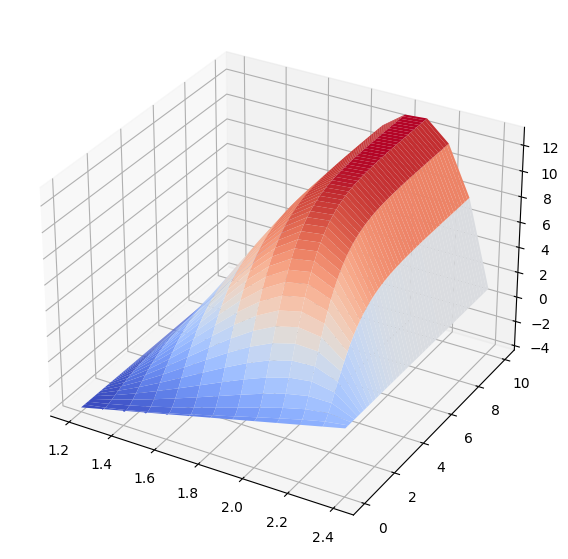

In [ ]:
solution = compute_explicit_scheme(h, theta, 
                                   left_bound, right_bound, lower_bound, upper_bound, 
                                   left_condition, right_condition, 
                                   f_function, phi, compute_first_scheme_coefficients)
plot_solution(solution, h, theta, left_bound, right_bound, lower_bound, upper_bound)

1. Решить задачу и построить графики решений при значениях t = $0$, $5\tau$, $20\tau$, $500\tau$.

In [ ]:
solution = compute_explicit_scheme(h, theta, 
                                   left_bound, right_bound, lower_bound, upper_bound, 
                                   left_condition, right_condition, 
                                   f_function, phi, compute_first_scheme_coefficients)

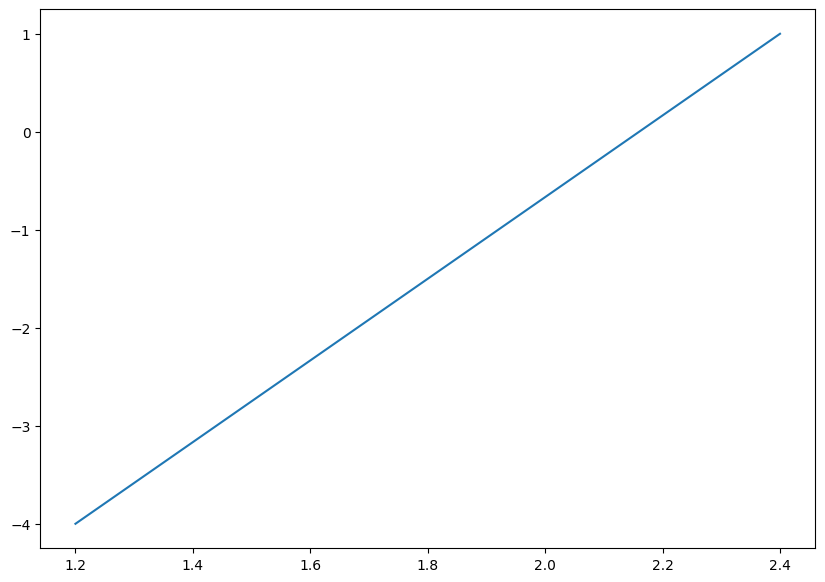

In [ ]:
plot_solution_with_fixed_time(solution, h, theta, 0)

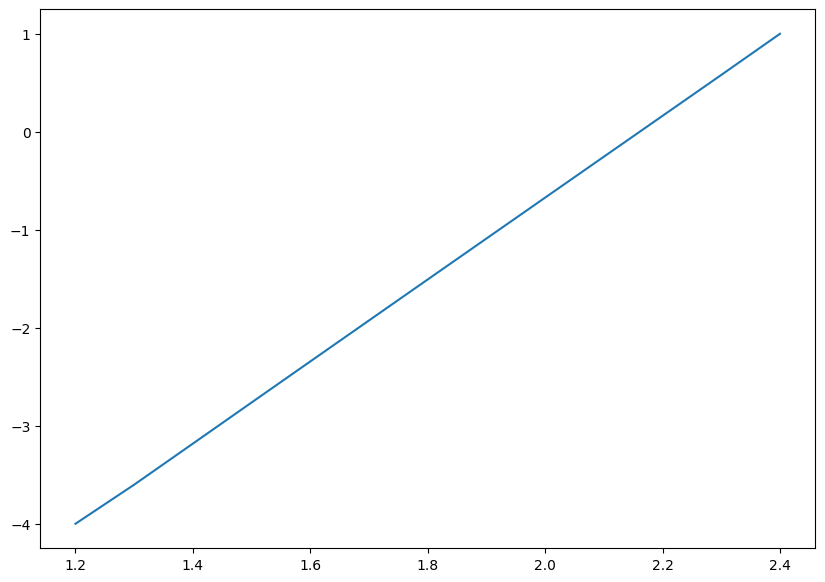

In [ ]:
plot_solution_with_fixed_time(solution, h, theta, 5)

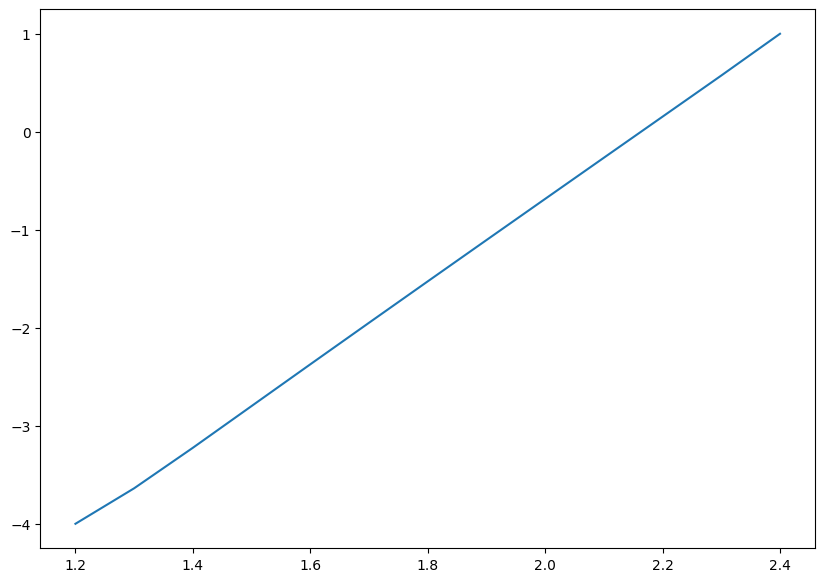

In [ ]:
plot_solution_with_fixed_time(solution, h, theta, 20)

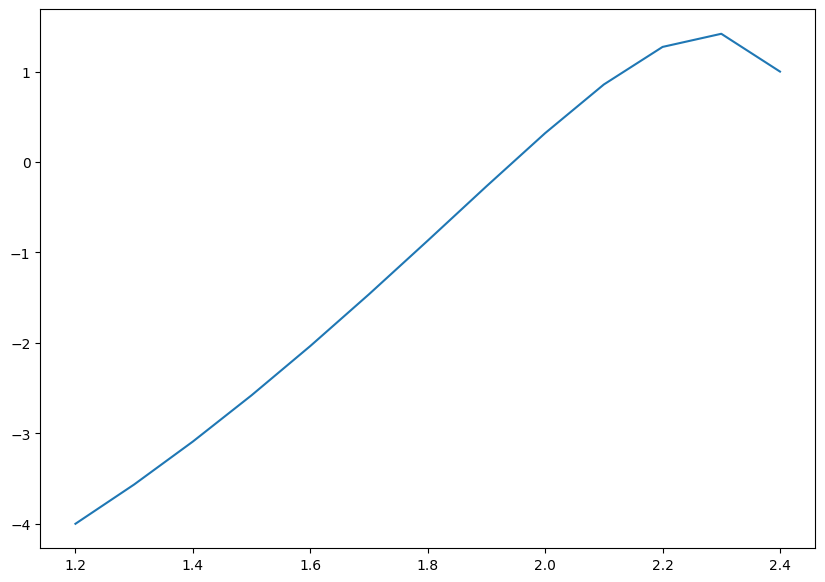

In [ ]:
plot_solution_with_fixed_time(solution, h, theta, 500)

2. Экспериментально определить момент времени t, при котором происходит установление процесса (визуально).

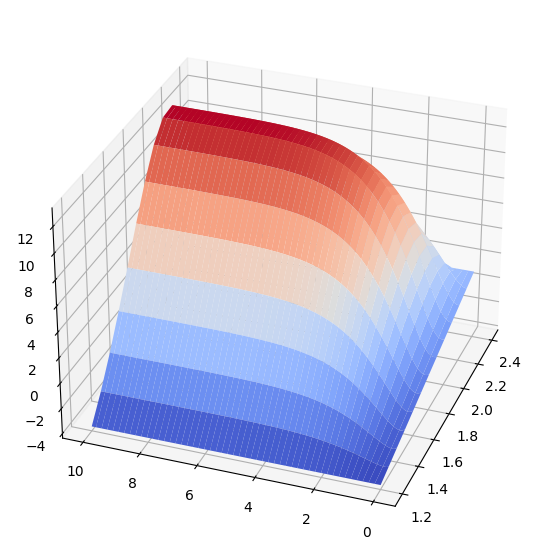

In [ ]:
solution = compute_explicit_scheme(h, theta, 
                                   left_bound, right_bound, lower_bound, upper_bound, 
                                   left_condition, right_condition, 
                                   f_function, phi, compute_first_scheme_coefficients)
ax = plot_solution(solution, h, theta, left_bound, right_bound, lower_bound, upper_bound)
ax.view_init(30, 200)

Исходя из данного графика, рассмотрим временной промежуток от $3000\tau$ до $6000\tau$

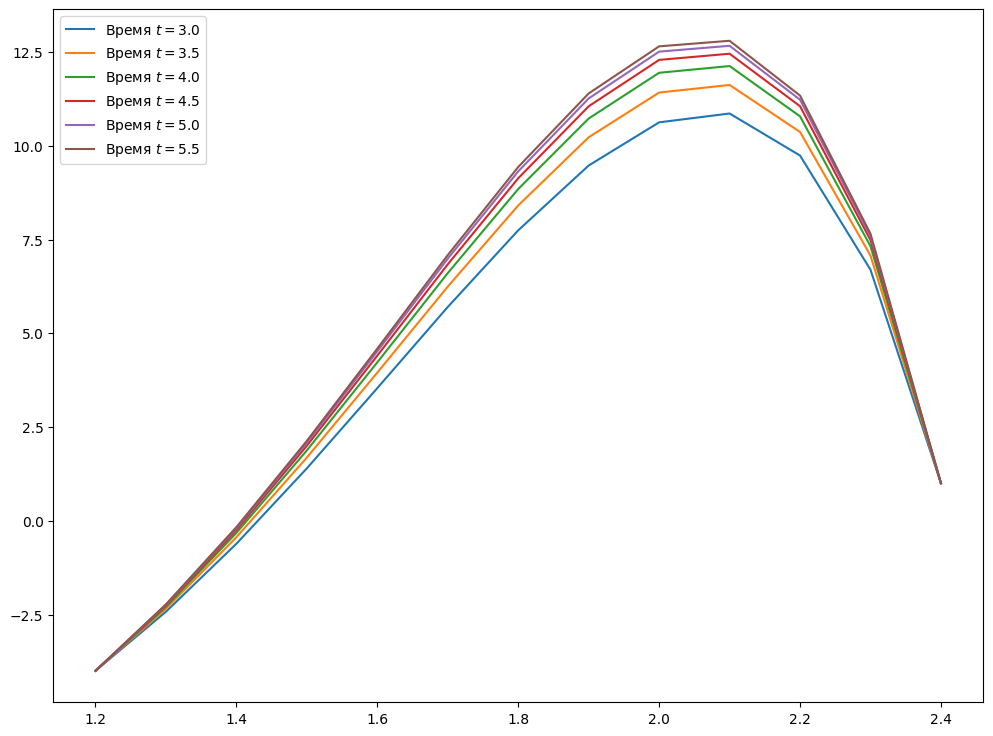

In [ ]:
plot_solution_with_fixed_times(solution, h, theta, np.arange(3000, 6000, 500), left_bound, right_bound)

Как видно из графика в момент времени $t=4.5$ процесс становится стационарным. 

3. Исследовать, как влияет начальная температура на процесс установления, взяв другие функции $\phi$(x) (согласованные с граничными условиями).


<Axes3DSubplot:>

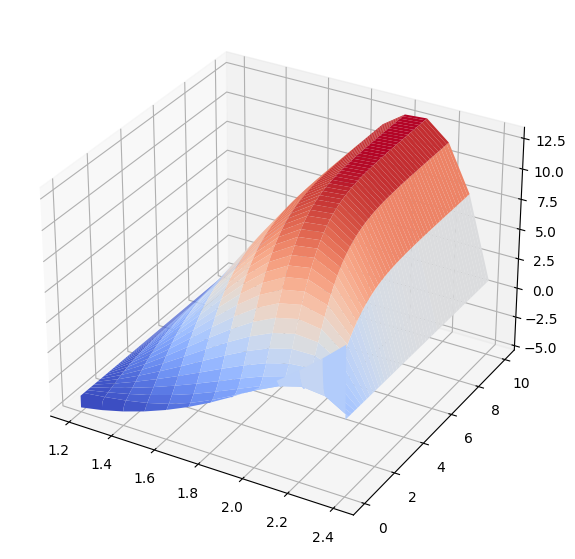

In [ ]:
phi = lambda x: 425/72 * x**2 - 45 / 4 * x
solution = compute_explicit_scheme(h, theta, 
                                   left_bound, right_bound, lower_bound, upper_bound, 
                                   left_condition, right_condition, 
                                   f_function, phi, compute_first_scheme_coefficients)
plot_solution(solution, h, theta, left_bound, right_bound, lower_bound, upper_bound)

<Axes3DSubplot:>

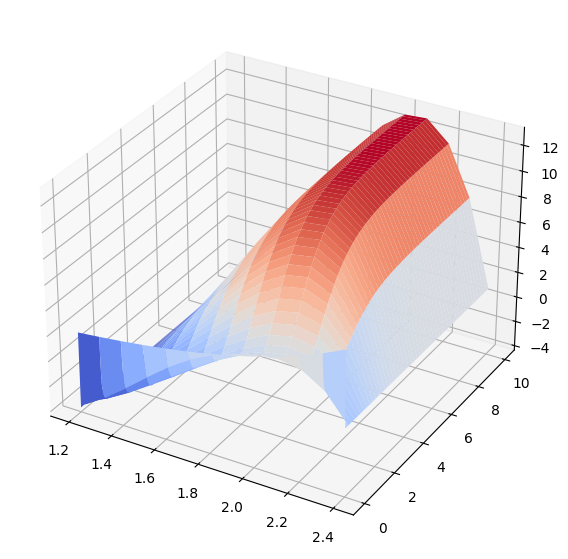

In [ ]:
phi = lambda x: exp(x**2 * 0.194 + x * 0.344)
solution = compute_explicit_scheme(h, theta, 
                                   left_bound, right_bound, lower_bound, upper_bound, 
                                   left_condition, right_condition, 
                                   f_function, phi, compute_first_scheme_coefficients)
plot_solution(solution, h, theta, left_bound, right_bound, lower_bound, upper_bound)

Как видно из данных графиков (что потверждается на практике), начальная температура влияет только на раннее ($t < 2$) состояние процесса, затем процесс устанавливается и принимает одинаковое значение независимо от начальной температуры.

## Задание №4

Воспользуемся уже разработанным инструментарием из задания 3. Требуется лишь составить функциию для рассчета матрицы коэффициентов.

Приступим к решению задачи вида: $$\frac{\delta u}{\delta t} = k(x)\frac{\delta^2 u}{\delta x^2}+ f(x, t)$$ Распишем по формуле правых производных $\frac{\delta^ u}{\delta t}$ и по формуле центральных производных $\frac{\delta^2 u}{\delta x^2}$:

$$\frac{u(x, t + \tau) - u(x, t)}{\tau} = k(x)\frac{u(x + h, t) - 2u(x, t) + 2u(x - h, t)}{h^2} + f(x, t)$$
Из этого уравнения выразим $u(x, t + \tau)$:
$$u(x, t + \tau) = u(x + h, t)\frac{\tau k(x + h)}{h^2} + u(x, t)\frac{1 - 2\tau k(x)}{h^2} + u(x - h, t)\frac{\tau k(x - h)}{h^2} + f(x, t)$$


In [ ]:
k_function = lambda x: 1
f_function = lambda x, t: x

left_bound = 0
right_bound = 2

lower_bound = 0
upper_bound = 3

left_condition_function = lambda t: 0
right_condition_function = lambda t: 2

h = (right_bound - left_bound) / 10
theta = 0.001

phi = lambda x: x

In [ ]:
def compute_second_scheme_coefficients(h: float, theta: float, left_bound: float, right_bound: float) -> np.array:
    x_points = np.arange(left_bound, right_bound, h)
    next_i_coefficients = np.vectorize(lambda x: k_function(x) * theta / h**2)(x_points)
    i_coefficients = np.vectorize(lambda x: 1 - 2 * k_function(x) * theta / h**2)(x_points)
    previous_coefficients = np.vectorize(lambda x: k_function(x) * theta / h**2)(x_points)
    return np.vstack((next_i_coefficients, i_coefficients, previous_coefficients))

<Axes3DSubplot:>

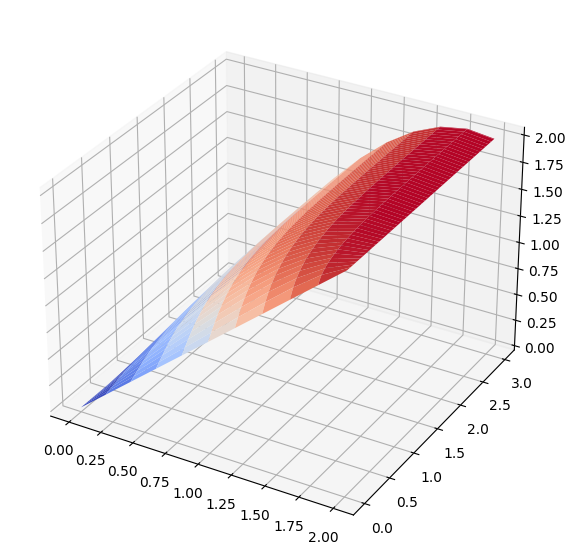

In [ ]:
solution = compute_explicit_scheme(h, theta, 
                                   left_bound, right_bound, lower_bound, upper_bound, 
                                   left_condition_function, right_condition_function, 
                                   f_function, phi, compute_second_scheme_coefficients)
plot_solution(solution, h, theta, left_bound, right_bound, lower_bound, upper_bound)

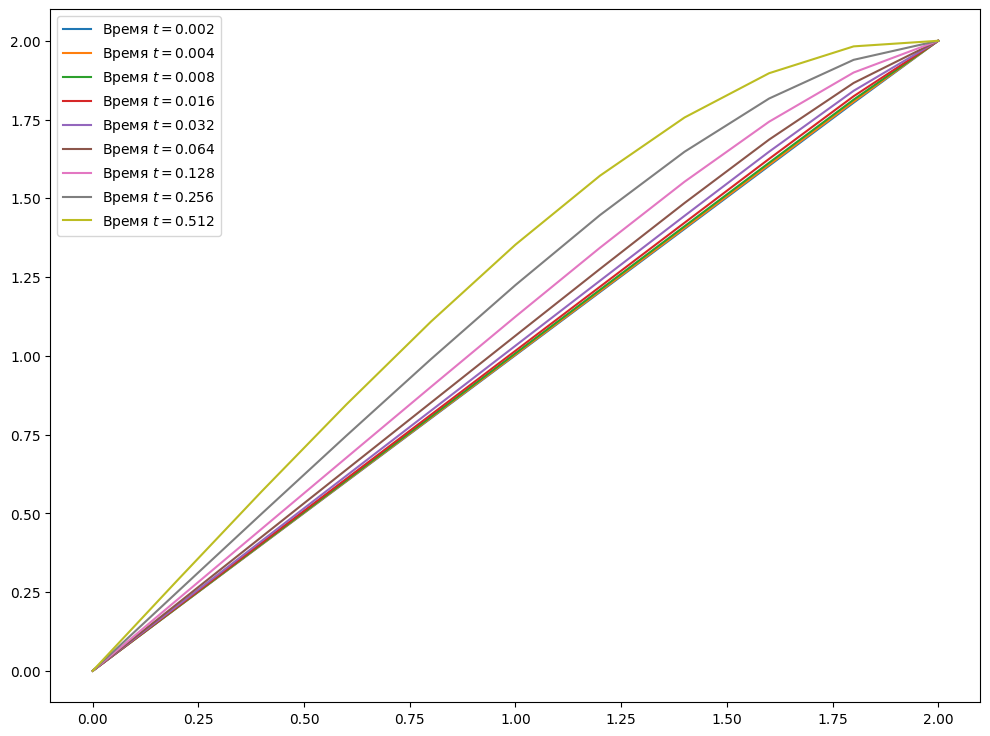

In [ ]:
plot_solution_with_fixed_times(solution, h, theta, 2 ** np.arange(1,10) , left_bound, right_bound)

# Вывод

В лабораторной работе я промоделировал процессы, связанные со стационарными и нестационарными уравнениями теплопроводности. Для этого был разработан инструментарий, позволяющий наблюдать и иследовать процессы, описанными в заданиях лабораторной работы.

Так, в первое задание было направлено на изучение целого семейства функций, описывающих функцию теплопроводности. В зависимости от изменения коэффициентов теплопроводности, а также начальных условий, изменяется решение дифференциального уравнения. Также в данном задании проверялась корректность работы разработанного инструментария (проверка на соответствии начальным условиям, сравнение с аналитическим решением).

Вторая задача направлена на изучение поведения решения в зависимости от функции теплопроводности, при этом функция 
теплопроводности ступенчатая (константая на интервалах). Связи с этим, интепретация решения понятна - на каждом из интервалов функция имеет отличительный от других интервалов вид. Также во второй части задания требуется промоделировать точечный источник тепла при помощи дельта функции. Поэтому разностная схема меняет свой вид (использован метод баланса), при этом результаты хорошо интепретируется на основании физической модели процесса.

Третья и четвертая задачи ислледуют нестационарное уравнение теплопроводности. В этих задачах упор делается на выявление времени установления процесса, а так же изучение зависимости решения задачи от начальных условий.

Таким образом, разработанный инструментарий позволяет не только решить поставленные задачи, однако и провести начальные исследование процессов, описанных в них.